In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objs as go
from matplotlib.pyplot import figure

In [162]:
ball_by_ball = pd.read_csv("IPL Ball-by-Ball 2008-2020.csv")
match_data = pd.read_csv("IPL Matches 2008-2020.csv")

In [163]:
ball_by_ball.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [164]:
match_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,19-04-2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,19-04-2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,20-04-2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,20-04-2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [165]:
match_data.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [166]:
match_data.shape

(816, 17)

In [167]:
match_data.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [168]:
print('Total matches :', match_data.shape[0])
print('Venues played at :',match_data['city'].unique())
print('Teams: ', match_data.team1.unique())

Total matches : 816
Venues played at : ['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' nan 'Rajkot' 'Kanpur' 'Bengaluru' 'Dubai' 'Sharjah']
Teams:  ['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Delhi Capitals']


In [169]:
# Adding a new column
match_data['Season'] = pd.DatetimeIndex(match_data['date']).year
match_data.head()

c:\Users\vedan\Desktop\heart-disease-prediction\env\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning:

Parsing '18-04-2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

c:\Users\vedan\Desktop\heart-disease-prediction\env\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning:

Parsing '19-04-2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

c:\Users\vedan\Desktop\heart-disease-prediction\env\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning:

Parsing '20-04-2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

c:\Users\vedan\Desktop\heart-disease-prediction\env\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning:

Parsing '21-04-2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

c:\Users\vedan\Desktop\heart

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,19-04-2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,19-04-2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,20-04-2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,20-04-2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008


## `Number of matches and teams analysis`

#### Number of matches in each season

In [227]:
match_per_season=match_data.groupby(['Season'])['id'].count().reset_index().rename(columns={'id':'matches'})
match_per_season.style.background_gradient(cmap='gnuplot2')

,Season,matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


#### Max, Min and Avg. number of matches

In [171]:
max(match_per_season['matches'])

76

In [172]:
min(match_per_season['matches'])

57

In [173]:
sum(match_per_season['matches'])/12

68.0

#### Number of teams in each season

In [174]:
l = []
k = []
i =2008
while i <=2020 :
    number_of_teams = match_data[match_data['Season']==i]
    number_of_teams = number_of_teams['team1'].unique() 
    a = str(i)
    k.append(a)
    i+=1
    l.append(len(number_of_teams))

data = {'Season':k,'Number of teams':l}
season_matches = pd.DataFrame(data)
season_matches


,Season,Number of teams
0,2008,8
1,2009,7
2,2010,8
3,2011,10
4,2012,9
5,2013,9
6,2014,8
7,2015,8
8,2016,8
9,2017,8


In [175]:
season_matches['matches'] = match_per_season['matches']

In [176]:
season_matches

,Season,Number of teams,matches
0,2008,8,58
1,2009,7,57
2,2010,8,60
3,2011,10,73
4,2012,9,74
5,2013,9,76
6,2014,8,60
7,2015,8,59
8,2016,8,60
9,2017,8,59


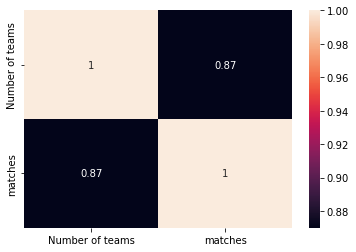

In [177]:
matrix = season_matches[["Number of teams", "matches"]].corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

This shows that there is strong correlation between the number of matches, as IPL has been always using round robin format irrespective of number of teams

Hence we can say that the number of matches played depend only on total number of teams in that season

#### Total number of matches played by a team

In [178]:
matches_played_byteams=pd.concat([match_data['team1'],match_data['team2']],axis=1)
teams=(matches_played_byteams['team1'].value_counts()+matches_played_byteams['team2'].value_counts()).reset_index()
teams.columns=['Team Name','Total Matches played']
teams.sort_values(by=['Total Matches played'],ascending=False).reset_index().drop('index',axis=1).style.background_gradient(cmap='gnuplot2')

,Team Name,Total Matches played
0,Mumbai Indians,203
1,Royal Challengers Bangalore,195
2,Kolkata Knight Riders,192
3,Kings XI Punjab,190
4,Chennai Super Kings,178
5,Delhi Daredevils,161
6,Rajasthan Royals,161
7,Sunrisers Hyderabad,124
8,Deccan Chargers,75
9,Pune Warriors,46


From the above table we see that there are large differences between total matches played by each team. Let's look at the number of seasons played by each team if it gives us the reason for this

#### Number of seasons played by each team

In [179]:
teams1 = teams['Team Name']
md = []

for i in range(0,len(teams1)):
    j = 2008
    count = 0
    while j<=2020:
        teams_data = match_data[match_data['Season']==j]
        if teams1[i] in teams_data['team1'].unique():
            count+=1
        j+=1
        
    md.append(count)

md

[11, 5, 2, 11, 2, 13, 1, 13, 13, 3, 10, 2, 13, 8]

In [180]:
teams['Season Played'] = md
teams.sort_values(by=['Total Matches played'],ascending=False).reset_index().drop('index',axis=1).style.background_gradient(cmap='gnuplot2')

,Team Name,Total Matches played,Season Played
0,Mumbai Indians,203,13
1,Royal Challengers Bangalore,195,13
2,Kolkata Knight Riders,192,13
3,Kings XI Punjab,190,13
4,Chennai Super Kings,178,11
5,Delhi Daredevils,161,11
6,Rajasthan Royals,161,10
7,Sunrisers Hyderabad,124,8
8,Deccan Chargers,75,5
9,Pune Warriors,46,3


##### Reasons for such large differences between total matches played by each team
- Kochi Tuskers Kerala have played only 1 season of IPL hence they played only 14 matches

- Gujarat lions and Rising Pune Supergiant have played only 2 seasons and hence they have played only 30 matches

- Pune Warriors have played only 3 seasons and thus have low number of matches

- Delhi capital is the new name of Delhi Daredevils. Hence we can say that total matches and seasons played by the team were 194 and 13 respectively.

- Deccan Chargers have played lesser number of matches as they were out from IPL after 5 seasons

- Chennai Super Kings were also not present in 3 seasons and Rajasthan Royals were also not present for 3 seasons and hence have played relatively lesser number of matches

- Mumbai Indians have played most number of matches as they have played in every season of IPL and have also reached play-offs more of the teams compared to the number of times other teams who played all the seasons of IPL

## `Runs Analysis`

#### Analysing the number of runs in each tournament

In [181]:
season_data=match_data[['id','Season']].merge(ball_by_ball, left_on = 'id', right_on = 'id', how = 'left').drop('id', axis = 1)
season_data.head()

,Season,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,2008,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,2008,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,2008,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,2008,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,2008,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [182]:
runs = []
i =2008
while i<=2020:
    runs_scored = season_data[season_data['Season']==i]
    runs_scored = sum(runs_scored['total_runs'])
    
    runs.append(runs_scored)
    i+=1

runs

[17937,
 16320,
 18864,
 21154,
 22453,
 22541,
 18909,
 18332,
 18862,
 18769,
 19901,
 19400,
 19352]

In [183]:
k

['2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020']

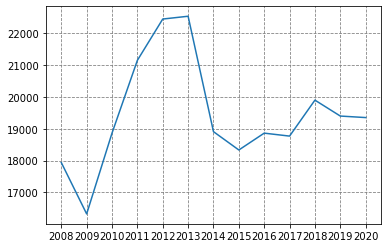

In [184]:
plt.plot(k,runs)
plt.grid(True ,color="grey" ,linestyle="--")
plt.show()

What lead to sharp increase in total runs after 2009 and then a sharp decrease ?

In [185]:
data = {'Season':k,'Number of teams':l,'total runs':runs}
season_run = pd.DataFrame(data)
season_run

,Season,Number of teams,total runs
0,2008,8,17937
1,2009,7,16320
2,2010,8,18864
3,2011,10,21154
4,2012,9,22453
5,2013,9,22541
6,2014,8,18909
7,2015,8,18332
8,2016,8,18862
9,2017,8,18769


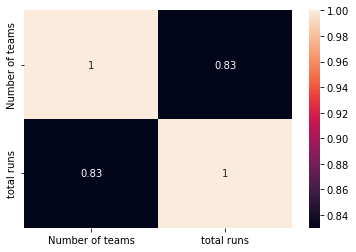

In [186]:
matrix = season_run[["Number of teams", "total runs"]].corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

This shows that there is strong correlation beteen the number of teams and the runs scored. Since the total number of teams increase the number of matches and hence the total runs scored.

We can also see from the plot that total runs were lowest in 2009, since the number of teams(and hence the total number of matches) were lowest in 2009

#### Average runs per match

In [187]:
# Average runs
season_run['Avg runs'] = season_run['total runs']/season_matches['matches']

In [188]:
season_run

,Season,Number of teams,total runs,Avg runs
0,2008,8,17937,309.258621
1,2009,7,16320,286.315789
2,2010,8,18864,314.400000
3,2011,10,21154,289.780822
4,2012,9,22453,303.418919
5,2013,9,22541,296.592105
6,2014,8,18909,315.150000
7,2015,8,18332,310.711864
8,2016,8,18862,314.366667
9,2017,8,18769,318.118644


##### Average runs per innings

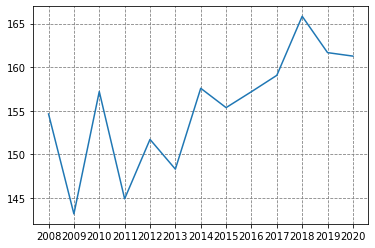

In [189]:
plt.plot(k,season_run['Avg runs']/2)
plt.grid(True ,color="grey" ,linestyle="--")
plt.show()

The above graph shows that the average runs scored per innings were lowest in 2009 and highest in 2018.

The reason for lower average score in 2009 was because the tournament was held in South Africa, where the pitches are low scoring.

The average runs scored per innigns was 155+ after 2013 due to entry of new young players in IPL who were quite aggressive with the bat.

#### Analysing extra runs

In [190]:
extra = []
i = 2008
while i<=2020:
    extra_run = season_data[season_data['Season']==i]
    extra_run = sum(extra_run['extra_runs'])
    extra.append(extra_run)
    i+=1
extra

[1128, 976, 1129, 1226, 1130, 1114, 987, 923, 900, 862, 803, 827, 844]

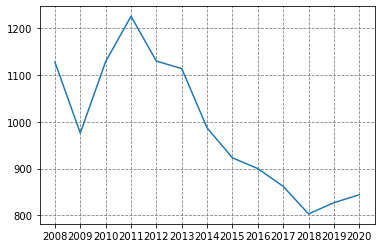

In [191]:
plt.plot(k,extra)
plt.grid(True ,color="grey" ,linestyle="--")
plt.show()

##### Extra runs per matches

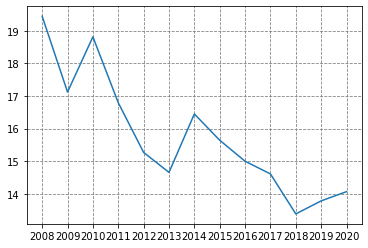

In [192]:
avg_extra = extra/season_matches['matches']
plt.plot(k,avg_extra)
plt.grid(True ,color="grey" ,linestyle="--")
plt.show()

This shows an interesting trend that the average extra runs per match has been decreasing over the years.
The sharp drop came in the years between 2010 to 2013

It is also interesting to observe that the extra runs were lowest in `2018 season` which actually has the highest total runs scored

#### Team with highest avg runs

In [194]:
th = teams['Team Name'].tolist()
th
runs_list = []
for i in range(0,len(th)):
    total_runs = season_data[season_data['batting_team']==th[i]]
    total_runs = sum(total_runs['total_runs'])
    runs_list.append(total_runs)
runs_list

[28363,
 11463,
 5296,
 24285,
 4856,
 30017,
 1901,
 29383,
 32286,
 6358,
 24507,
 4533,
 30214,
 19332]

In [195]:
team_run_dict = {'Team':teams['Team Name'], 'Runs':runs_list}
team_run = pd.DataFrame(team_run_dict)
team_run['Average runs'] = team_run['Runs']/teams['Total Matches played']
team_run.sort_values(by=['Average runs'],ascending=False).reset_index().drop('index',axis=1)


,Team,Runs,Average runs
0,Gujarat Lions,4856,161.866667
1,Delhi Capitals,5296,160.484848
2,Chennai Super Kings,28363,159.342697
3,Mumbai Indians,32286,159.044335
4,Kings XI Punjab,30017,157.984211
5,Sunrisers Hyderabad,19332,155.903226
6,Royal Challengers Bangalore,30214,154.943590
7,Kolkata Knight Riders,29383,153.036458
8,Deccan Chargers,11463,152.840000
9,Rajasthan Royals,24507,152.217391


This Shows that Gujarat lions was the team having highest average runs and Kochi Tuskars Kerala had lowest average runs

The above table shows an intersting trend, that the average runs of `Delhi Daredevils` changed by 10 when their name was changed to `Delhi Capitals`

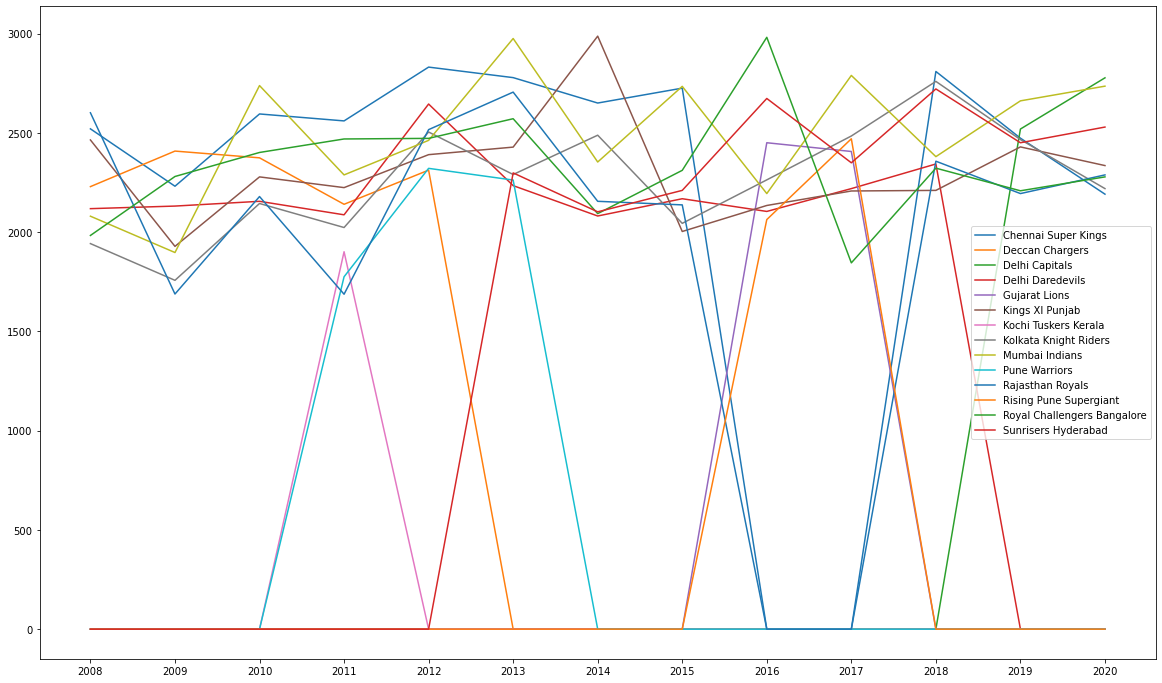

In [196]:

season_run_dict = {}
plt.figure(figsize=(20, 12))
for i in range(0,len(th)):
    j = 2008
    count = 0
    lis = []
    while j<=2020:
        teams_data1 = season_data[season_data['Season']==j]
        teams_data1 = teams_data1[teams_data1['batting_team']==th[i]]
        lis.append(sum(teams_data1['total_runs']))
        j+=1
    season_run_dict[th[i]] = lis
    plt.plot(season_run['Season'],lis)

plt.legend(th)

The above plot appears quite messy, hence we plot the runs only for the teams who have played atleast 9 seasons

In [197]:
teams

,Team Name,Total Matches played,Season Played
0,Chennai Super Kings,178,11
1,Deccan Chargers,75,5
2,Delhi Capitals,33,2
3,Delhi Daredevils,161,11
4,Gujarat Lions,30,2
5,Kings XI Punjab,190,13
6,Kochi Tuskers Kerala,14,1
7,Kolkata Knight Riders,192,13
8,Mumbai Indians,203,13
9,Pune Warriors,46,3


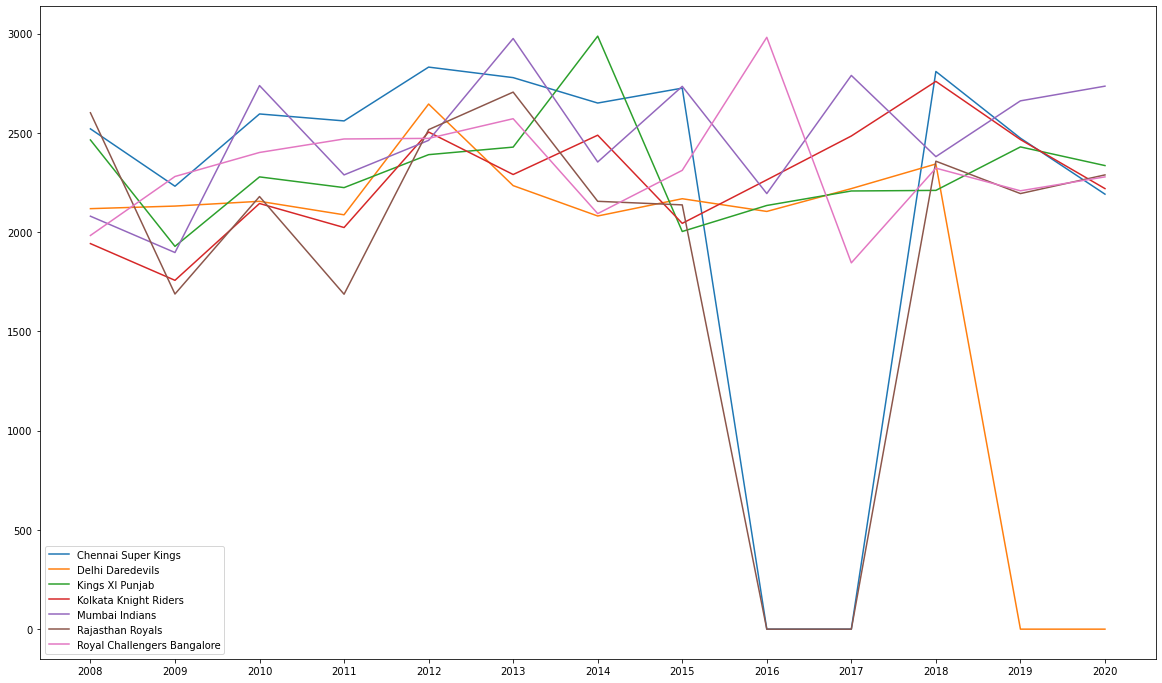

In [198]:

season_run_dict = {}
ss = teams['Season Played'].tolist()
plt.figure(figsize=(20, 12))
abc = []
for i in range(0,len(th)):
    j = 2008
    count = 0
    lis = []
    if ss[i] <9:
        continue
    abc.append(th[i])
    while j<=2020:
        teams_data1 = season_data[season_data['Season']==j]
        teams_data1 = teams_data1[teams_data1['batting_team']==th[i]]
        lis.append(sum(teams_data1['total_runs']))
        j+=1
    season_run_dict[th[i]] = lis
    plt.plot(season_run['Season'],lis)

plt.legend(abc)

In the above plot we see that runs scored by some teams are zero when they are not the part of the season.
We can also see that runs by each team keeps on fluctuating and we can't comment if a team is improving or degrading

#### Runs conceeded by teams

In [199]:
th = teams['Team Name'].tolist()
th
runs_list = []
for i in range(0,len(th)):
    total_runs = season_data[season_data['bowling_team']==th[i]]
    total_runs = sum(total_runs['total_runs'])
    runs_list.append(total_runs)
runs_list


[27245,
 11618,
 5351,
 24715,
 5079,
 30427,
 1986,
 29374,
 31158,
 6801,
 24705,
 4549,
 30596,
 18934]

In [200]:
team_run_dict = {'Team':teams['Team Name'], 'Runs':runs_list}
team_run = pd.DataFrame(team_run_dict)
team_run['Average Conceeded runs'] = team_run['Runs']/teams['Total Matches played']
team_run.sort_values(by=['Average Conceeded runs'],ascending=False).reset_index().drop('index',axis=1)

,Team,Runs,Average Conceeded runs
0,Gujarat Lions,5079,169.300000
1,Delhi Capitals,5351,162.151515
2,Kings XI Punjab,30427,160.142105
3,Royal Challengers Bangalore,30596,156.902564
4,Deccan Chargers,11618,154.906667
5,Delhi Daredevils,24715,153.509317
6,Mumbai Indians,31158,153.487685
7,Rajasthan Royals,24705,153.447205
8,Chennai Super Kings,27245,153.061798
9,Kolkata Knight Riders,29374,152.989583


#### Player with highest runs

In [201]:
players = season_data['batsman'].unique().tolist()
pl = players[0]
player_runs = season_data[season_data['batsman']==players[0]]
max_runs = sum(player_runs['batsman_runs'])
player_name = players[0]
for i in range(1,len(players)):
    player_runs = season_data[season_data['batsman']==players[i]]
    player_runs = sum(player_runs['batsman_runs'])
    if player_runs > max_runs:
        max_runs = player_runs
        player_name = players[i]

print(f'Max runs are scored by {player_name} [{max_runs} runs]')

Max runs are scored by V Kohli [5878 runs]


#### Player with max number of runs in each season

In [202]:
j =2008
while j <=2020:
    season_data1 = season_data[season_data['Season']==j]
    players = season_data1['batsman'].unique().tolist()
    pl = players[0]
    player_runs = season_data1[season_data1['batsman']==players[0]]
    max_runs = sum(player_runs['batsman_runs'])
    player_name = players[0]
    for i in range(1,len(players)):
        player_runs = season_data1[season_data1['batsman']==players[i]]
        player_runs = sum(player_runs['batsman_runs'])
        if player_runs > max_runs:
            max_runs = player_runs
            player_name = players[i]

    print(f'Max runs scored in IPL season {j} are by {player_name} [{max_runs} runs]')
    j+=1

Max runs scored in IPL season 2008 are by SE Marsh [616 runs]
Max runs scored in IPL season 2009 are by ML Hayden [572 runs]
Max runs scored in IPL season 2010 are by SR Tendulkar [618 runs]
Max runs scored in IPL season 2011 are by CH Gayle [608 runs]
Max runs scored in IPL season 2012 are by CH Gayle [733 runs]
Max runs scored in IPL season 2013 are by MEK Hussey [733 runs]
Max runs scored in IPL season 2014 are by RV Uthappa [660 runs]
Max runs scored in IPL season 2015 are by DA Warner [562 runs]
Max runs scored in IPL season 2016 are by V Kohli [973 runs]
Max runs scored in IPL season 2017 are by DA Warner [641 runs]
Max runs scored in IPL season 2018 are by KS Williamson [735 runs]
Max runs scored in IPL season 2019 are by DA Warner [692 runs]
Max runs scored in IPL season 2020 are by KL Rahul [670 runs]


#### Team with highest number of boundaries

In [203]:
teams_names = teams['Team Name'].tolist()
teams_names_data = season_data[season_data['batting_team']==teams_names[0]]
teams_names_data =teams_names_data['batsman_runs'].tolist()
count = 0
for j in teams_names_data:
    if  j>=4:
        count+=1

max_boundary = count
boundary_team_name = teams_names[0]
print(f'Boundaries by {teams_names[0]} are {count}')

for i in range(1,len(teams_names)):
    teams_names_data = season_data[season_data['batting_team']==teams_names[i]]
    teams_names_data =  teams_names_data['batsman_runs'].tolist()
    count = 0
    for j in teams_names_data:
        if j>=4:
            count+=1
    print(f'Boundaries by {teams_names[i]} are {count}')
    if count > max_boundary:
        max_boundary = count
        boundary_team_name = teams_names[i]
        
print(f'Hence Team with max number of boundaries is {boundary_team_name} with {max_boundary} boundaries')


Boundaries by Chennai Super Kings are 3429
Boundaries by Deccan Chargers are 1362
Boundaries by Delhi Capitals are 649
Boundaries by Delhi Daredevils are 2961
Boundaries by Gujarat Lions are 616
Boundaries by Kings XI Punjab are 3705
Boundaries by Kochi Tuskers Kerala are 223
Boundaries by Kolkata Knight Riders are 3648
Boundaries by Mumbai Indians are 4045
Boundaries by Pune Warriors are 723
Boundaries by Rajasthan Royals are 2986
Boundaries by Rising Pune Supergiant are 525
Boundaries by Royal Challengers Bangalore are 3734
Boundaries by Sunrisers Hyderabad are 2264
Hence Team with max number of boundaries is Mumbai Indians with 4045 boundaries


#### Bowler conceeding highest number of runs per wickets bowled(bowler should have bowled at least 20 overs )

In [204]:
bowler_runs = season_data['bowler'].unique().tolist()
runs_given =season_data[season_data['bowler'] ==bowler_runs[0]]

p =0 
while len(runs_given['bowler'].tolist())/6 <20:
    p+=1
    runs_given = season_data[season_data['bowler'] == bowler_runs[p]]

overs_bowled = len(runs_given['bowler'].tolist())/6
runs_given = sum(runs_given['total_runs'])
bowler_run_name = bowler_runs[p]
max_economy = runs_given/overs_bowled
ovb = overs_bowled    

for i in range(p+1,len(bowler_runs)):
    runs_given =season_data[season_data['bowler'] ==bowler_runs[i]]
    overs_bowled = len(runs_given['bowler'].tolist())/6
    runs_given = sum(runs_given['total_runs'])
    economy = runs_given/overs_bowled
    if overs_bowled > 20:
        if economy > max_economy:
            max_economy = economy
            bowler_run_name = bowler_runs[i]
            ovb = overs_bowled


print(f'Bowler giving max runs is {bowler_run_name} with {max_economy} runs per over who bowled {ovb} overs in his IPL career')        

Bowler giving max runs is P Amarnath with 10.954545454545455 runs per over who bowled 22.0 overs in his IPL career


#### Bowler conceeding highest number of extra runs(bowler should have bowled atleast 20 overs )

In [205]:
bowler_runs = season_data['bowler'].unique().tolist()
runs_given =season_data[season_data['bowler'] ==bowler_runs[0]]

p =0 
while len(runs_given['bowler'].tolist())/6 <20:
    p+=1
    runs_given = season_data[season_data['bowler'] == bowler_runs[p]]

overs_bowled = len(runs_given['bowler'].tolist())/6
runs_given = sum(runs_given['extra_runs'])
bowler_run_name = bowler_runs[p]
max_economy = runs_given/overs_bowled
ovb = overs_bowled    

for i in range(p+1,len(bowler_runs)):
    runs_given =season_data[season_data['bowler'] ==bowler_runs[i]]
    overs_bowled = len(runs_given['bowler'].tolist())/6
    runs_given = sum(runs_given['extra_runs'])
    economy = runs_given/overs_bowled
    if overs_bowled > 20:
        if economy > max_economy:
            max_economy = economy
            bowler_run_name = bowler_runs[i]
            ovb = overs_bowled


print(f'Bowler giving max extra runs is {bowler_run_name} with {max_economy} extra runs per over who bowled {ovb} overs in his IPL career. Total extra runs by him were {max_economy*ovb*6}')   

Bowler giving max extra runs is Umar Gul with 1.2549019607843137 extra runs per over who bowled 25.5 overs in his IPL career. Total extra runs by him were 192.0


## `Wicket Analysis`

#### Analysing the number of Wickets in each tournament

In [206]:
total_wickets = []

i=2008
while i <=2020:
    wickets = season_data[season_data['is_wicket']==1]
    wickets = wickets[wickets['Season'] == i ]
    total_wickets.append(sum(wickets['is_wicket']))
    i+=1

total_wickets
    

[690, 697, 722, 813, 858, 910, 672, 687, 666, 709, 722, 681, 668]

In [207]:
# Average wickets per match  
avg_wickets = total_wickets/season_matches['matches']
avg_wickets

0     11.896552
1     12.228070
2     12.033333
3     11.136986
4     11.594595
5     11.973684
6     11.200000
7     11.644068
8     11.100000
9     12.016949
10    12.033333
11    11.350000
12    11.133333
Name: matches, dtype: float64

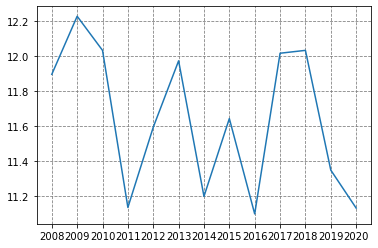

In [208]:
plt.plot(k,avg_wickets)
plt.grid(True ,color="grey" ,linestyle="--")
plt.show()

This shows an interesting trend that the average number of wickets per match are fluctuate around 11 and 12 and don't show much variation

Also we can see that average wickers per match were maximum in 2009, which could be attributed to more bowler friendly pitches in South Africa

#### Is there a relation between number of wickets and average runs scored per innings?

In [209]:
data = {'Season':k,'Avg Runs per match':season_run['Avg runs'],'Avg Wickets per match':avg_wickets}
run_wicket = pd.DataFrame(data)
run_wicket

,Season,Avg Runs per match,Avg Wickets per match
0,2008,309.258621,11.896552
1,2009,286.315789,12.228070
2,2010,314.400000,12.033333
3,2011,289.780822,11.136986
4,2012,303.418919,11.594595
5,2013,296.592105,11.973684
6,2014,315.150000,11.200000
7,2015,310.711864,11.644068
8,2016,314.366667,11.100000
9,2017,318.118644,12.016949


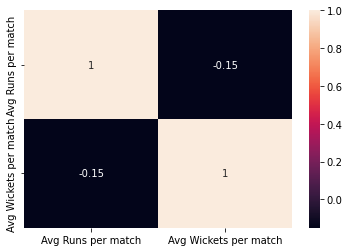

In [210]:
matrix = run_wicket[["Avg Runs per match", "Avg Wickets per match"]].corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

This shows that there is not much correlation between total wickets per match and avg runs scored per match. 

Infact we can see that 2018 with highest number of avg run per match had 3rd highest number wickets per match  

#### Bowler with maximum number of Wickets

In [211]:
bowlers = season_data['bowler'].unique().tolist()
bowler_data = season_data[season_data['bowler']==bowlers[0]]
count =0
for i in bowler_data['is_wicket']:
     if i==1:
          count+=1
max_wickets = count
bowler_name = bowlers[0]
for i in range(1,len(bowlers)):
    bowler_data = season_data[season_data['bowler']==bowlers[i]]
    count =0
    for j in bowler_data['is_wicket']:
         if j==1:
              count+=1
    if count>max_wickets:
         max_wickets = count
         bowler_name = bowlers[i]

print(f'Bowler with maximum number of wickets {bowler_name} with {max_wickets} wickets')

Bowler with maximum number of wickets SL Malinga with 188 wickets


#### Bowler with max number of wickets in each season

In [212]:
k =2008
while k<=2020:
    season_data2 = season_data[season_data['Season']==k]
    bowlers = season_data2['bowler'].unique().tolist()
    bowler_data = season_data2[season_data2['bowler']==bowlers[0]]
    count =0
    for i in bowler_data['is_wicket']:
        if i==1:
            count+=1
    max_wickets = count
    bowler_name = bowlers[0]
    for i in range(1,len(bowlers)):
        bowler_data = season_data2[season_data2['bowler']==bowlers[i]]
        count =0
        for j in bowler_data['is_wicket']:
            if j==1:
                  count+=1
        if count>max_wickets:
            max_wickets = count
            bowler_name = bowlers[i]

    print(f'Bowler with maximum number of wickets in IPL season {k} is {bowler_name} with {max_wickets} wickets')
    k+=1

Bowler with maximum number of wickets in IPL season 2008 is Sohail Tanvir with 24 wickets
Bowler with maximum number of wickets in IPL season 2009 is RP Singh with 26 wickets
Bowler with maximum number of wickets in IPL season 2010 is PP Ojha with 22 wickets
Bowler with maximum number of wickets in IPL season 2011 is SL Malinga with 30 wickets
Bowler with maximum number of wickets in IPL season 2012 is M Morkel with 30 wickets
Bowler with maximum number of wickets in IPL season 2013 is DJ Bravo with 34 wickets
Bowler with maximum number of wickets in IPL season 2014 is MM Sharma with 26 wickets
Bowler with maximum number of wickets in IPL season 2015 is DJ Bravo with 28 wickets
Bowler with maximum number of wickets in IPL season 2016 is B Kumar with 24 wickets
Bowler with maximum number of wickets in IPL season 2017 is B Kumar with 28 wickets
Bowler with maximum number of wickets in IPL season 2018 is AJ Tye with 28 wickets
Bowler with maximum number of wickets in IPL season 2019 is K 

## Win/Loss Analysis

#### Relation between team batting or bowling first and the winner

In [213]:
match_data['result'].value_counts()

wickets    435
runs       364
tie         13
Name: result, dtype: int64

We can see that 435 out of 816 matches was won by team batting second while 364 matches was won by team batting first.

#### Number of times team have won the tournament

In [214]:
winning_teams = match_data[['Season','winner']]

winners_team = {}
for i in sorted(winning_teams.Season.unique()):
    winners_team[i] = winning_teams[winning_teams.Season == i]['winner'].tail(1).values[0]
    
winners = pd.Series(winners_team)
winners = pd.DataFrame(winners, columns=['team'])

In [215]:
winners

,team
2008,Rajasthan Royals
2009,Deccan Chargers
2010,Chennai Super Kings
2011,Chennai Super Kings
2012,Kolkata Knight Riders
2013,Mumbai Indians
2014,Kolkata Knight Riders
2015,Mumbai Indians
2016,Sunrisers Hyderabad
2017,Mumbai Indians


In [216]:
fig=px.bar( y=winners['team'].value_counts(),x=winners['team'].value_counts().index,labels=dict(x="Team Name",y="Count"))
fig.update_layout(title="Winners of IPL",
                  titlefont={'size': 26},template='simple_white'     
                  )

fig.show()

#### Number of Tosses won by teams

In [217]:
match_data['toss_winner'].value_counts()

Mumbai Indians                 106
Kolkata Knight Riders           98
Chennai Super Kings             97
Royal Challengers Bangalore     87
Rajasthan Royals                87
Kings XI Punjab                 85
Delhi Daredevils                80
Sunrisers Hyderabad             57
Deccan Chargers                 43
Pune Warriors                   20
Delhi Capitals                  20
Gujarat Lions                   15
Rising Pune Supergiant          13
Kochi Tuskers Kerala             8
Name: toss_winner, dtype: int64

#### Decision made after winning Toss

In [218]:
temp_series = match_data.toss_decision.value_counts()
labels = (np.array(temp_series.index))
values = (np.array((temp_series / temp_series.sum())*100))
colors = ['blue', 'red']
fig = go.Figure(data=[go.Pie(labels=labels,
                             values=values,hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='label+percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=3)))
fig.update_layout(title="Toss decision percentage",
                  titlefont={'size': 30},
                  )
fig.show()

#### Toss decision in each season

In [219]:
fig=px.histogram(data_frame=match_data,x='Season',color='toss_decision',color_discrete_sequence=colors,barmode='group')
fig.update_layout(title="Toss decision in different seasons",
                  titlefont={'size': 26},template='simple_white'     
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1)
fig.show()

This shows that after winnig the toss the team tends to field first 

#### Does winning toss implies winning game?

In [220]:
match_data['toss_win_game_win'] = np.where((match_data.toss_winner == match_data.winner),'Yes','No')
match_data.head()


,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season,toss_win_game_win
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008,No
1,335983,Chandigarh,19-04-2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008,Yes
2,335984,Delhi,19-04-2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008,No
3,335985,Mumbai,20-04-2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008,No
4,335986,Kolkata,20-04-2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008,No


In [221]:
labels =["Yes",'No']
values = match_data['toss_win_game_win'].value_counts()
colors = ['turquoise', 'crimson']
fig = go.Figure(data=[go.Pie(labels=labels,
                             values=values,hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='label+percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=3)))
fig.update_layout(title="Winning toss implies winning macthes?",
                  titlefont={'size': 30},
                  )
fig.show()

Hence we can say that it doesn't matter if team looses or wins toss

#### Success Rate 

In [222]:
wins=pd.DataFrame(match_data['winner'].value_counts()).reset_index()
wins.columns=['Team Name','Wins']
wins

,Team Name,Wins
0,Mumbai Indians,120
1,Chennai Super Kings,106
2,Kolkata Knight Riders,99
3,Royal Challengers Bangalore,91
4,Kings XI Punjab,88
5,Rajasthan Royals,81
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,66
8,Deccan Chargers,29
9,Delhi Capitals,19


In [223]:
played=teams.merge(wins,left_on='Team Name',right_on='Team Name',how='inner')
played['% Win']=(played['Wins']/played['Total Matches played'])*100
played.sort_values(by=['% Win'],ascending=False).reset_index().drop('index',axis=1)

,Team Name,Total Matches played,Season Played,Wins,% Win
0,Chennai Super Kings,178,11,106,59.550562
1,Mumbai Indians,203,13,120,59.113300
2,Delhi Capitals,33,2,19,57.575758
3,Sunrisers Hyderabad,124,8,66,53.225806
4,Kolkata Knight Riders,192,13,99,51.562500
5,Rajasthan Royals,161,10,81,50.310559
6,Rising Pune Supergiant,30,2,15,50.000000
7,Royal Challengers Bangalore,195,13,91,46.666667
8,Kings XI Punjab,190,13,88,46.315789
9,Gujarat Lions,30,2,13,43.333333


#### Man of the match awards (Top 10)

In [226]:
colors = ['turquoise',] * 11
colors[0] = 'crimson'
fig=px.bar(x=match_data.player_of_match.value_counts()[:10].index,y=match_data.player_of_match.value_counts()[:10],labels=dict(x="Players",y="Count"),)
fig.update_layout(title="Top 10 MOM awardee",
                  titlefont={'size': 26},template='simple_white'     
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()